In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Section 1: Data Preparation**


In [83]:
# Load the dataset
file_path = './Wholesale customers data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## **Section 2: Data Preprocessing**

In [84]:

# حذف ستون‌های Channel و Region چون برای خوشه‌بندی نیاز نیستند
features = data.drop(columns=['Channel', 'Region'])

# نرمال‌سازی داده‌ها بدون استفاده از sklearn
def normalize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data

normalized_data = normalize(features.values)

# بررسی داده‌های مفقود
missing_data = pd.DataFrame(normalized_data).isnull().sum()
print(missing_data)


0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


## **Section 3: Initial Cluster Centers Selection**

In [85]:
import random


In [86]:
def kmeanscetroid(data, k):
    centroids = []
    centroids.append(data[random.randint(0, len(data) - 1)])
    
    for _ in range(1, k):
        distances = np.array([min([np.inner(c-x, c-x) for c in centroids]) for x in data])
        probs = distances / distances.sum()
        cumulative_probs = probs.cumsum()
        r = random.random()
        
        for i, p in enumerate(cumulative_probs):
            if r < p:
                centroids.append(data[i])
                break
                
    return np.array(centroids)

## **Section 4: Assigning Samples to the Nearest Cluster**

In [87]:
def assign_clusters(data, centroids):
    clusters = []
    for x in data:
        distances = [np.inner(x - c, x - c) for c in centroids]
        cluster = distances.index(min(distances))
        clusters.append(cluster)
    return np.array(clusters)


## **Section 5: Updating Cluster Centers**

In [88]:
def upadateing_center(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        new_centroids.append(np.mean(cluster_points, axis=0))
    return np.array(new_centroids)


## **Section 6: Iterating Steps 3 and 4 Until Convergence**

In [89]:
def kmeans(data, k, max_iters=100, tol=1e-4):
    centroids = kmeanscetroid(data, k)
    for _ in range(max_iters):
        old_centroids = centroids
        clusters = assign_clusters(data, centroids)
        centroids = upadateing_center(data, clusters, k)
        
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
            
    return centroids, clusters


In [90]:
k = 3  # تعداد خوشه‌ها
centroids, clusters = kmeans(normalized_data, k)


## **Section 7: Performance Evaluation**

In [91]:
from sklearn.metrics import silhouette_score

def calculate_sse(data, centroids, clusters):
    sse = 0
    for i in range(len(data)):
        centroid = centroids[clusters[i]]
        sse += np.inner(data[i] - centroid, data[i] - centroid)
    return sse

sse = calculate_sse(normalized_data, centroids, clusters)
silhouette_avg = silhouette_score(normalized_data, clusters)

print(f"SSE: {sse}")
print(f"Silhouette Score: {silhouette_avg}")


SSE: 1604.0162997180867
Silhouette Score: 0.5424012335698595


### **Section 8: Analysis and Conclusion**

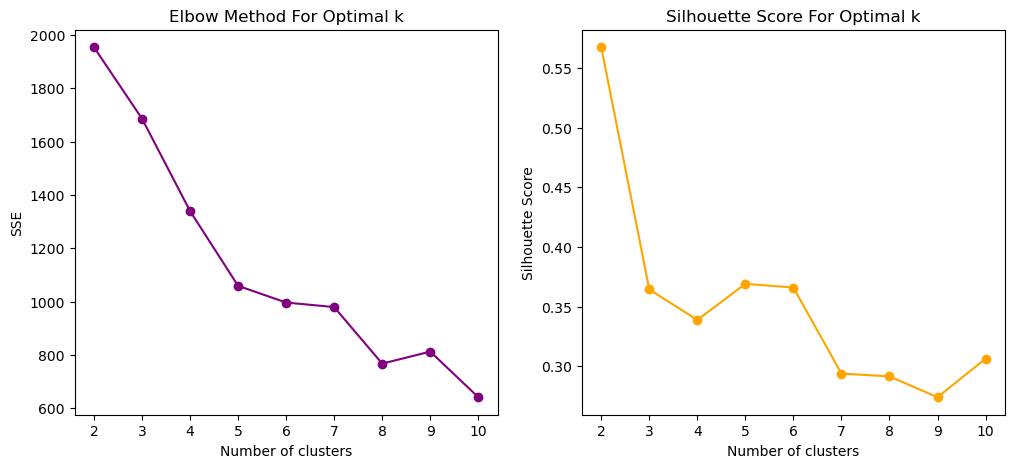

In [96]:
import matplotlib.pyplot as plt

sse_values = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    centroids, clusters = kmeans(normalized_data, k)
    sse = calculate_sse(normalized_data, centroids, clusters)
    silhouette_avg = silhouette_score(normalized_data, clusters)
    sse_values.append(sse)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse_values, marker='o',color="purple")
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o',color="orange")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.show()


In [97]:
import random

def initialize_centroids(data, k):
    centroids = data[random.sample(range(len(data)), k)]
    return np.array(centroids)


In [98]:
def assign_clusters(data, centroids):
    clusters = []
    for x in data:
        distances = [np.linalg.norm(x - c) for c in centroids]
        cluster = distances.index(min(distances))
        clusters.append(cluster)
    return np.array(clusters)


In [99]:
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        new_centroids.append(np.mean(cluster_points, axis=0))
    return np.array(new_centroids)


In [100]:
def kmeans(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        old_centroids = centroids
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
            
    return centroids, clusters


In [101]:
k = 3  # تعداد خوشه‌ها
centroids, clusters = kmeans(normalized_data, k)


In [102]:
from sklearn.metrics import silhouette_score

def calculate_sse(data, centroids, clusters):
    sse = 0
    for i in range(len(data)):
        centroid = centroids[clusters[i]]
        sse += np.linalg.norm(data[i] - centroid) ** 2
    return sse

sse = calculate_sse(normalized_data, centroids, clusters)
silhouette_avg = silhouette_score(normalized_data, clusters)

print(f"SSE: {sse}")
print(f"Silhouette Score: {silhouette_avg}")


SSE: 1642.2478719666924
Silhouette Score: 0.46114761602704457


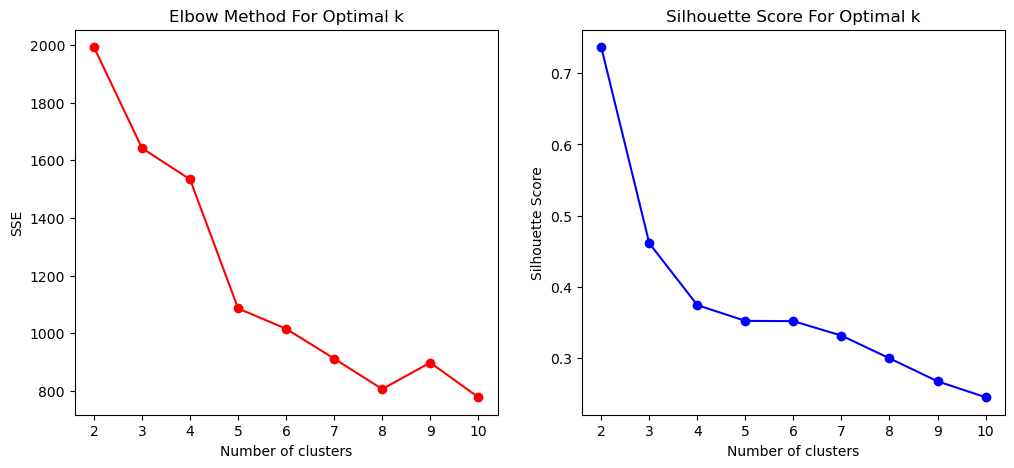

In [103]:
import matplotlib.pyplot as plt

sse_values = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    centroids, clusters = kmeans(normalized_data, k)
    sse = calculate_sse(normalized_data, centroids, clusters)
    silhouette_avg = silhouette_score(normalized_data, clusters)
    sse_values.append(sse)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse_values, marker='o',color="red")
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o',color="blue")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.show()
